# Handling Missing Values

In [68]:
# 导入数据集
data <- read.csv(url("http://bit.ly/infs5100_camden_data"))
head(data)

,OA,White_British,Low_Occupancy,Unemployed,Qualification
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,E00004120,42.35669,6.2937063,1.893939,73.62637
2,E00004121,47.20000,5.9322034,2.688172,69.90291
3,E00004122,40.67797,2.9126214,1.212121,67.58242
4,E00004123,49.66216,0.9259259,2.803738,60.77586
5,E00004124,51.13636,2.0000000,3.816794,65.98639
6,E00004125,41.41791,3.9325843,3.846154,74.20635


In [69]:
# get summary
summary(data)

      OA            White_British    Low_Occupancy      Unemployed    
 Length:749         Min.   : 7.882   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.:35.915   1st Qu.: 6.015   1st Qu.: 2.500  
 Mode  :character   Median :44.541   Median :10.000   Median : 4.186  
                    Mean   :44.832   Mean   :11.597   Mean   : 4.510  
                    3rd Qu.:54.472   3rd Qu.:16.107   3rd Qu.: 6.158  
                    Max.   :78.035   Max.   :64.286   Max.   :18.623  
 Qualification  
 Min.   :11.64  
 1st Qu.:36.32  
 Median :55.10  
 Mean   :51.43  
 3rd Qu.:66.23  
 Max.   :88.07  

向其中加入一些missing values：

In [70]:
# load library
install.packages("missForest")
library(missForest)

Warning message:
"package 'missForest' is in use and will not be installed"


In [71]:
# 创建一个新的数据，名为 data.mis，其中有10%的missing values
data.mis <- prodNA(data, noNA = 0.1)

In [72]:
# 查看一下这个新的数据的summary
summary(data.mis)

      OA            White_British    Low_Occupancy      Unemployed    
 Length:749         Min.   : 7.882   Min.   : 0.000   Min.   : 0.000  
 Class :character   1st Qu.:36.195   1st Qu.: 5.987   1st Qu.: 2.510  
 Mode  :character   Median :44.590   Median : 9.969   Median : 4.186  
                    Mean   :44.895   Mean   :11.549   Mean   : 4.520  
                    3rd Qu.:54.545   3rd Qu.:16.061   3rd Qu.: 6.116  
                    Max.   :78.035   Max.   :64.286   Max.   :18.623  
                    NA's   :77       NA's   :71       NA's   :72      
 Qualification  
 Min.   :11.64  
 1st Qu.:36.43  
 Median :55.51  
 Mean   :51.45  
 3rd Qu.:66.23  
 Max.   :88.07  
 NA's   :80     

In [73]:
# 首先移除categorical Variable
data.mis <- subset(data.mis, select = -c(OA))
head(data.mis)

,White_British,Low_Occupancy,Unemployed,Qualification
,<dbl>,<dbl>,<dbl>,<dbl>
1,42.35669,6.2937063,1.893939,73.62637
2,47.20000,5.9322034,2.688172,69.90291
3,40.67797,2.9126214,1.212121,67.58242
4,49.66216,0.9259259,2.803738,60.77586
5,51.13636,2.0000000,3.816794,NA
6,41.41791,3.9325843,3.846154,74.20635


In [74]:
# load library
install.packages("mice")
library(mice)

Warning message:
"package 'mice' is in use and will not be installed"


,Low_Occupancy,Unemployed,White_British,Qualification,
498,1,1,1,1,0
54,1,1,1,0,1
59,1,1,0,1,1
6,1,1,0,0,2
46,1,0,1,1,1
10,1,0,1,0,2
5,1,0,0,1,2
48,0,1,1,1,1
7,0,1,1,0,2
4,0,1,0,1,2


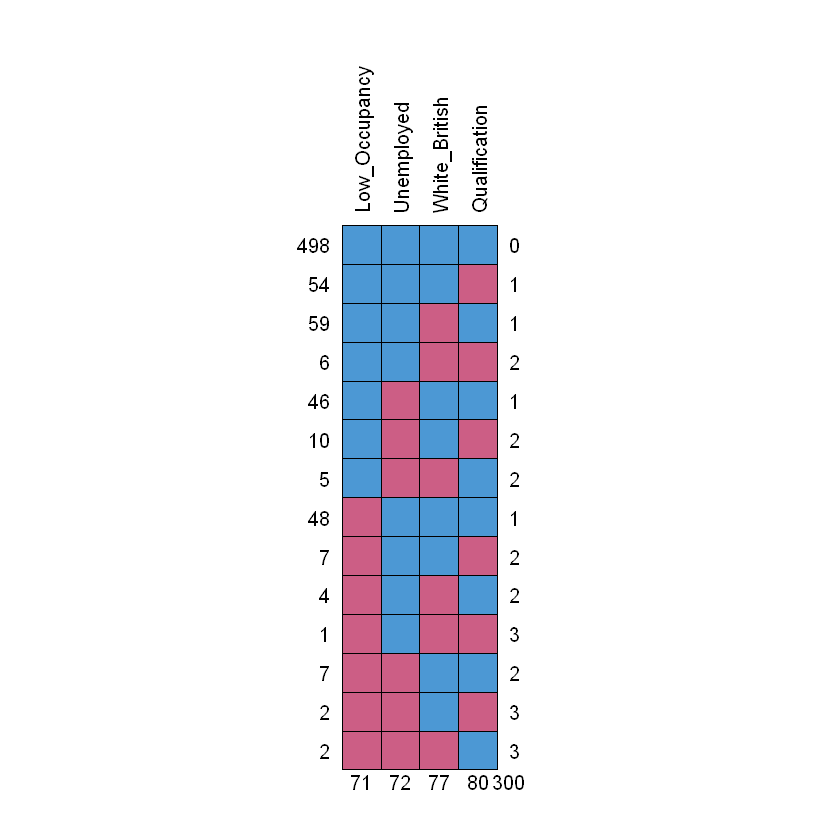

In [75]:
# Explore missing values
md.pattern(data.mis, rotate.names = TRUE)

In [76]:
install.packages("VIM")
library("VIM")

Warning message:
"package 'VIM' is in use and will not be installed"



 Variables sorted by number of missings: 
      Variable      Count
 Qualification 0.10680908
 White_British 0.10280374
    Unemployed 0.09612817
 Low_Occupancy 0.09479306


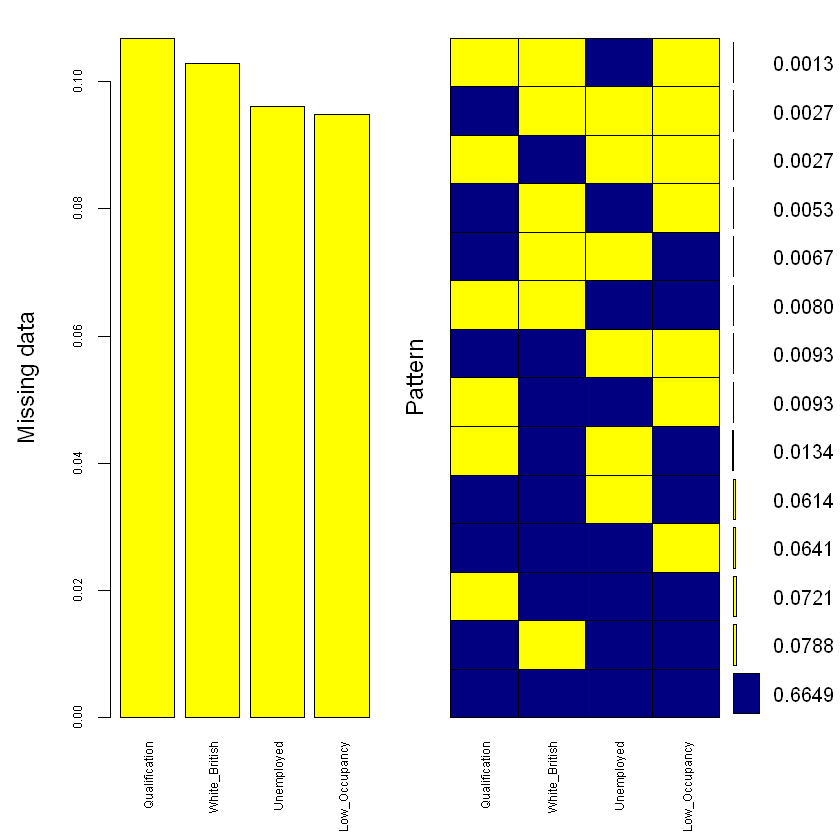

In [77]:
missing.plot <- aggr(data.mis, col=c("navyblue", "yellow"),
numbers = TRUE, sortVars = TRUE,
lables=names(data.mis), cex.axis=.6,
gap=3, ylab=c("Missing data", "Pattern"))

In [78]:
# impute 这些 missing values
data.imputed <- mice(data.mis, m = 3, maxit = 50, method = 'pmm',
                    seed = 500)

summary(data.imputed)


 iter imp variable
  1   1  White_British  Low_Occupancy  Unemployed  Qualification
  1   2  White_British  Low_Occupancy  Unemployed  Qualification
  1   3  White_British  Low_Occupancy  Unemployed  Qualification
  2   1  White_British  Low_Occupancy  Unemployed  Qualification
  2   2  White_British  Low_Occupancy  Unemployed  Qualification
  2   3  White_British  Low_Occupancy  Unemployed  Qualification
  3   1  White_British  Low_Occupancy  Unemployed  Qualification
  3   2  White_British  Low_Occupancy  Unemployed  Qualification
  3   3  White_British  Low_Occupancy  Unemployed  Qualification
  4   1  White_British  Low_Occupancy  Unemployed  Qualification
  4   2  White_British  Low_Occupancy  Unemployed  Qualification
  4   3  White_British  Low_Occupancy  Unemployed  Qualification
  5   1  White_British  Low_Occupancy  Unemployed  Qualification
  5   2  White_British  Low_Occupancy  Unemployed  Qualification
  5   3  White_British  Low_Occupancy  Unemployed  Qualification
  6  

这是对参数的讲解：

1. data.mis：这是包含缺失值的原始数据集。
2. m：指定进行多重插补的次数（imputations）。在这种情况下，设置为3意味着将进行3次插补。
3. maxit：指定每个插补迭代的最大迭代次数。这是一个控制收敛性的参数，当达到最大迭代次数时，迭代过程将停止。
4. method：指定用于插补缺失值的方法。在这里，选择了'pmm'，它表示使用预测匹配方法（predictive mean matching）进行插补。预测匹配方法通过从观测到的非缺失值中选择一个最相似的值来估计缺失值。
5. seed：设置随机种子，以确保结果的可重复性。通过设置相同的种子，可以获得相同的插补结果。

In [79]:
# Explore imputed values
data.imputed$imp$Unemployed

,1,2,3
,<dbl>,<dbl>,<dbl>
24,4.7872340,1.1278195,0.0000000
26,0.9090909,1.5564202,3.0864198
36,0.9523810,1.0204082,2.8985507
59,6.1170213,4.5751634,3.5190616
83,4.6979866,3.8626609,3.2863850
91,2.4630542,4.1666667,6.0498221
92,3.9568345,5.2631579,3.7735849
104,3.6496350,5.4607509,3.8626609
154,1.5544041,2.4154589,4.2168675


In [80]:
# select second complete dataset
data.complete <- complete(data.imputed, 2)
head(data.complete)

,White_British,Low_Occupancy,Unemployed,Qualification
,<dbl>,<dbl>,<dbl>,<dbl>
1,42.35669,6.2937063,1.893939,73.62637
2,47.20000,5.9322034,2.688172,69.90291
3,40.67797,2.9126214,1.212121,67.58242
4,49.66216,0.9259259,2.803738,60.77586
5,51.13636,2.0000000,3.816794,72.32143
6,41.41791,3.9325843,3.846154,74.20635


# Feature Selection

In [81]:
install.packages("mlr3")

Warning message:
"package 'mlr3' is in use and will not be installed"


In [82]:
install.packages("mlr3filters")
install.packages("mlr3learners")

Warning message:
"package 'mlr3filters' is in use and will not be installed"
Warning message:
"package 'mlr3learners' is in use and will not be installed"


In [83]:
install.packages("FSelectorRcpp")

Warning message:
"package 'FSelectorRcpp' is in use and will not be installed"


In [84]:
set.seed(999)  # 将随机种子设置为999
library(mlr3)
library(mlr3filters)
library(mlr3learners)
library(FSelectorRcpp)

In [85]:
filter.importance = flt("information_gain") # Creating a new filter
iris.task <- tsk("iris") # Creating a Task() object from the Iris dataset
iris.feature.importance <- filter.importance$calculate(iris.task)
as.data.table(iris.feature.importance)

feature,score
<chr>,<dbl>
Petal.Width,0.9554360
Petal.Length,0.9402853
Sepal.Length,0.4521286
Sepal.Width,0.2672750


上面的代码是使用R语言进行特征选择的示例代码。下面是对每一行代码的解释：

1. filter.importance = flt("information_gain")：这行代码创建了一个新的特征选择过滤器对象，并使用"information_gain"作为特征选择方法。"information_gain"（信息增益）是一种常用的特征选择指标，用于衡量特征对目标变量的信息贡献程度。
2. iris.task <- tsk("iris")：这行代码创建了一个Task对象，用于定义特征选择任务的数据集。在这个例子中，使用经典的鸢尾花数据集"Iris"作为示例数据集。
3. iris.feature.importance <- filter.importance$calculate(iris.task)：这行代码调用特征选择过滤器对象的calculate方法，对给定的数据集进行特征选择。这将返回一个包含特征重要性的结果对象，表示每个特征的重要性分数。
4. as.data.table(iris.feature.importance)：这行代码将特征重要性的结果对象转换为数据框（data frame）或数据表（data table）的形式，以便更方便地进行查看和进一步的分析。

从结果来看，Petal.Width和Petal.Length有着极高的预测力，而Sepal.Length和Sepal.Width有着降低预测里，Sepal.Length的预测里相对较高。

In [86]:
install.packages("mlr3viz")
library("mlr3viz")

Warning message:
"package 'mlr3viz' is in use and will not be installed"


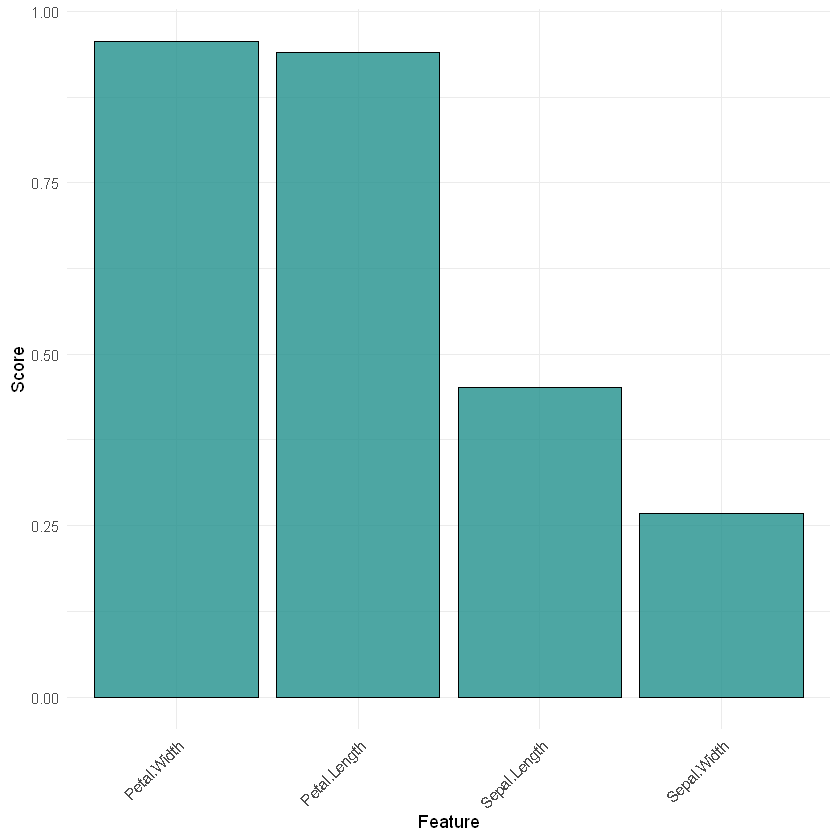

In [87]:
autoplot(iris.feature.importance)

In [88]:
install.packages("mlr3pipelines")
library("mlr3pipelines")

Warning message:
"package 'mlr3pipelines' is in use and will not be installed"


In [91]:
po = po("filter", filter.importance, filter.nfeat=3)
filtered.task = po$train(list(iris.task))[[1]]
filtered.task$feature_names

[1] "Petal.Length" "Petal.Width"  "Sepal.Length"

上述代码：
```
1. po = po("filter", filter.importance, filter.nfeat=3)：这行代码创建了一个PipeOp（管道操作）对象，用于定义特征选择后的任务过滤操作。在这里，使用了"filter"作为操作类型，filter.importance作为特征选择过滤器对象，并通过filter.nfeat=3参数指定最终选择的特征数量为3个。
2. filtered.task = po$train(list(iris.task))[[1]]：这行代码通过对原始iris.task进行特征选择过滤操作，创建了一个经过特征选择后的新任务对象filtered.task。这里使用了train方法来应用管道操作，它接受一个包含输入任务的列表，并返回一个经过管道操作后的任务列表。由于我们只有一个输入任务，因此使用[[1]]提取出经过特征选择后的任务对象。
3. filtered.task$feature_names：这行代码获取经过特征选择后的任务对象filtered.task中的特征名称。它返回一个包含经过特征选择后的特征名称的向量。
```

In [92]:
iris.filtered = subset(iris, select = filtered.task$feature_names)
head(iris.filtered)

,Petal.Length,Petal.Width,Sepal.Length
,<dbl>,<dbl>,<dbl>
1,1.4,0.2,5.1
2,1.4,0.2,4.9
3,1.3,0.2,4.7
4,1.5,0.2,4.6
5,1.4,0.2,5.0
6,1.7,0.4,5.4


# Correlation Analysis

In [94]:
install.packages("GGally")
library("GGally")

Installing package into 'C:/Users/yejiu/AppData/Local/R/win-library/4.3'
(as 'lib' is unspecified)

also installing the dependency 'reshape'




package 'reshape' successfully unpacked and MD5 sums checked
package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\yejiu\AppData\Local\Temp\RtmpCoR7LW\downloaded_packages


Loading required package: ggplot2

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



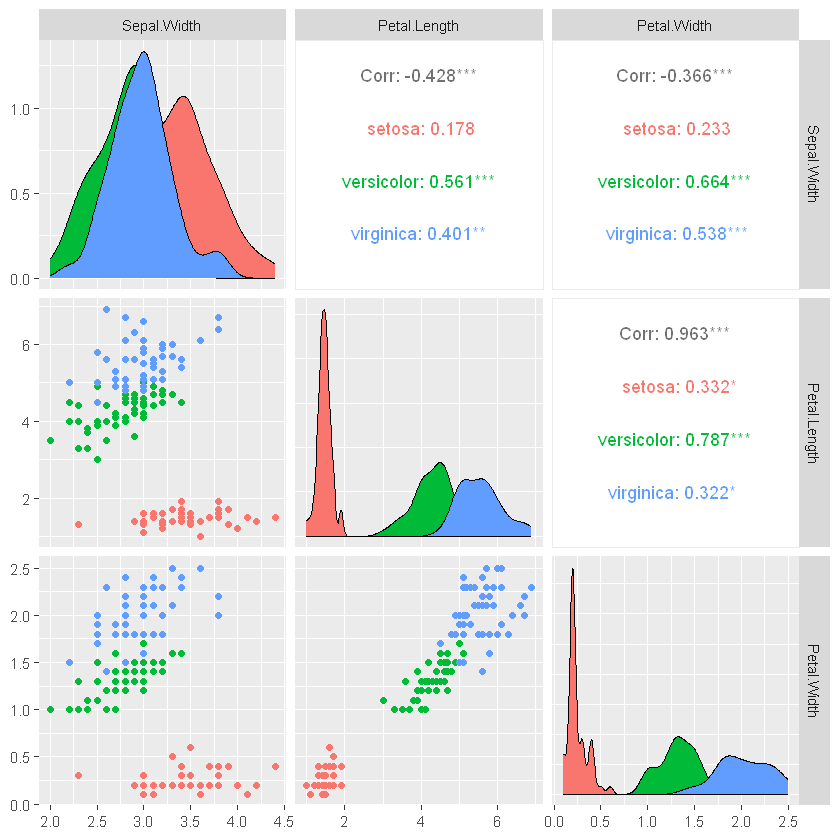

In [95]:
# Assess the distribution and correlation of variables in Iris dataset
ggpairs(iris, columns = 2:4, ggplot2::aes(colour=Species))